<a href="https://colab.research.google.com/github/AntonyMittul/Speech_Emotion_Recognition/blob/main/emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle/
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 96% 410M/428M [00:04<00:00, 97.3MB/s]
100% 428M/428M [00:05<00:00, 88.8MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from keras import utils
from keras import models
from keras import layers



In [ ]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')

Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_dead_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_king_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_search_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_pole_sad.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_rain_sad.wav']

In [ ]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad


In [ ]:
df['label'].value_counts()
df['label_count']= df['label'].value_counts()
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,sad
1,/content/tess toronto emotional speech set dat...,sad
2,/content/tess toronto emotional speech set dat...,sad
3,/content/tess toronto emotional speech set dat...,sad
4,/content/tess toronto emotional speech set dat...,sad
...,...,...
2795,/content/tess toronto emotional speech set dat...,disgust
2796,/content/tess toronto emotional speech set dat...,disgust
2797,/content/tess toronto emotional speech set dat...,disgust
2798,/content/tess toronto emotional speech set dat...,disgust


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

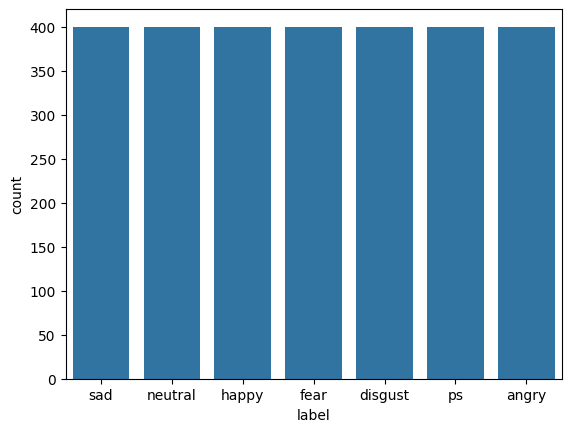

In [ ]:
sns.countplot(data=df, x='label')


In [ ]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,sad,NaN
1,/content/tess toronto emotional speech set dat...,sad,NaN
2,/content/tess toronto emotional speech set dat...,sad,NaN
3,/content/tess toronto emotional speech set dat...,sad,NaN
4,/content/tess toronto emotional speech set dat...,sad,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,disgust,NaN
2796,/content/tess toronto emotional speech set dat...,disgust,NaN
2797,/content/tess toronto emotional speech set dat...,disgust,NaN
2798,/content/tess toronto emotional speech set dat...,disgust,NaN


In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

stft= short time fourier transform

In [ ]:
df.drop('label_count', axis=1, inplace = True)

In [ ]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /content/tess toronto emotional speech set dat...   sad
1  /content/tess toronto emotional speech set dat...   sad
2  /content/tess toronto emotional speech set dat...   sad
3  /content/tess toronto emotional speech set dat...   sad
4  /content/tess toronto emotional speech set dat...   sad
['sad' 'neutral' 'happy' 'fear' 'disgust' 'ps' 'angry']


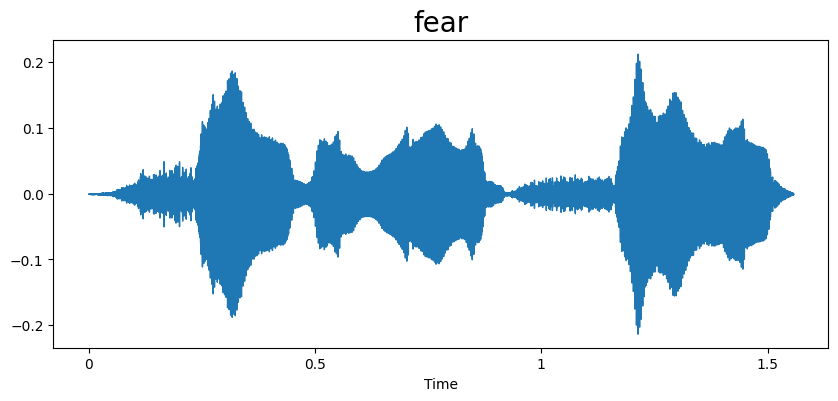

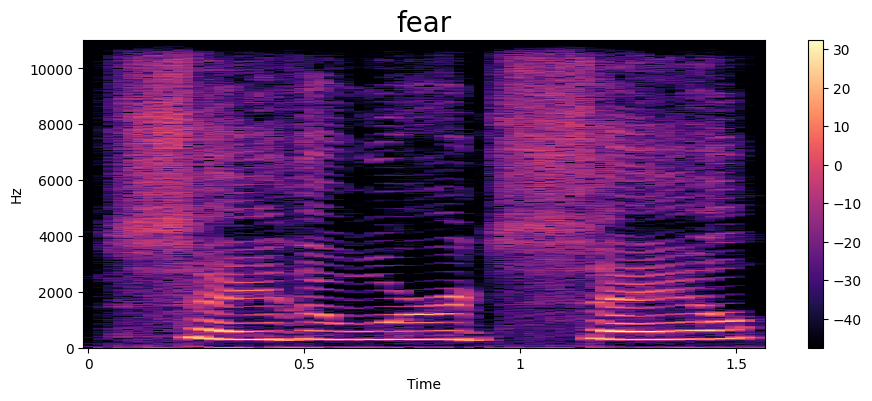

In [ ]:
df['speech'].unique()
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

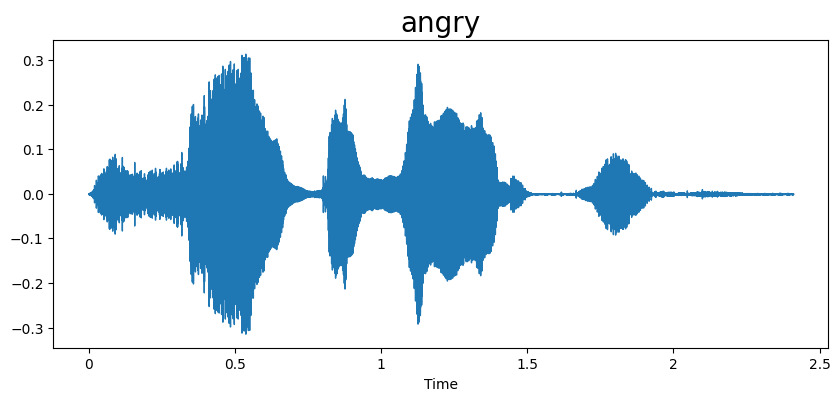

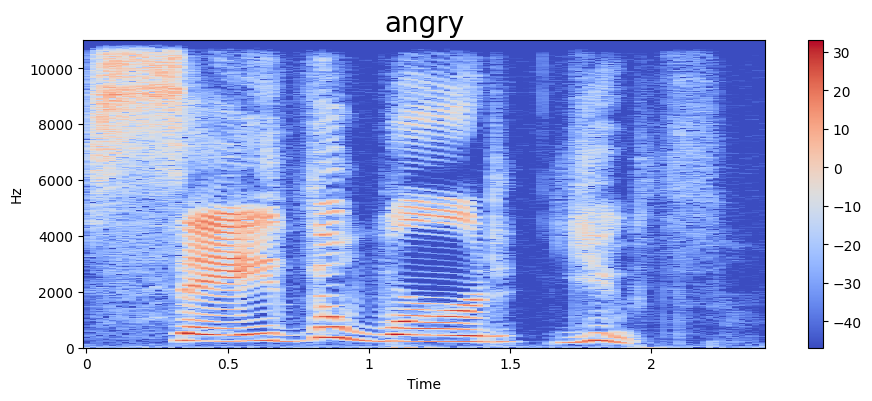

In [ ]:
df['speech'].unique()
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

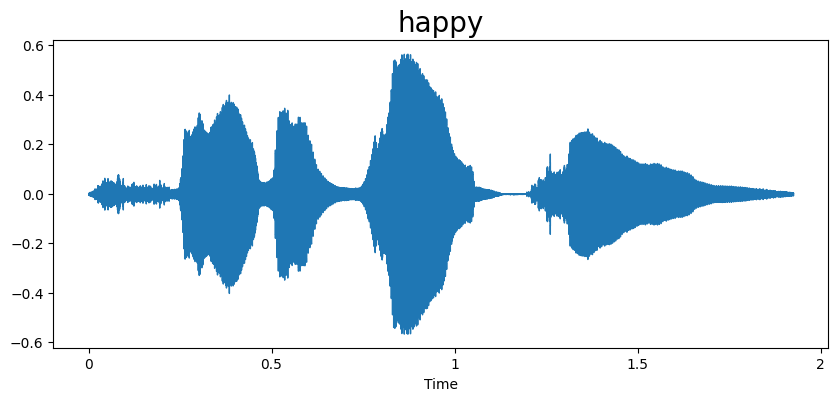

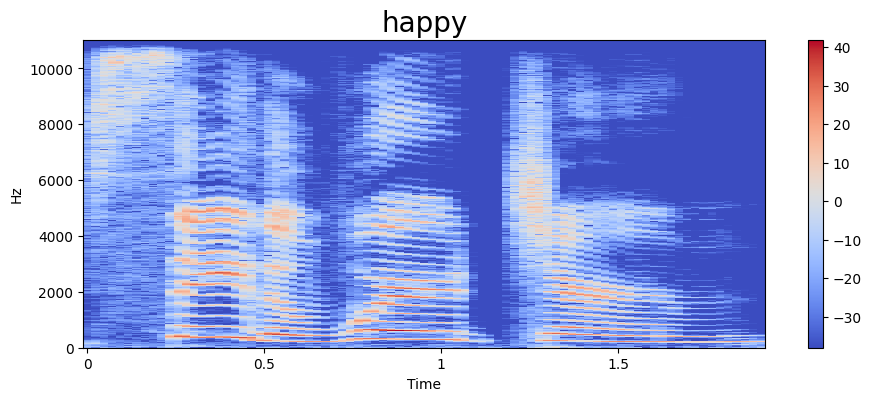

In [ ]:
df['speech'].unique()
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

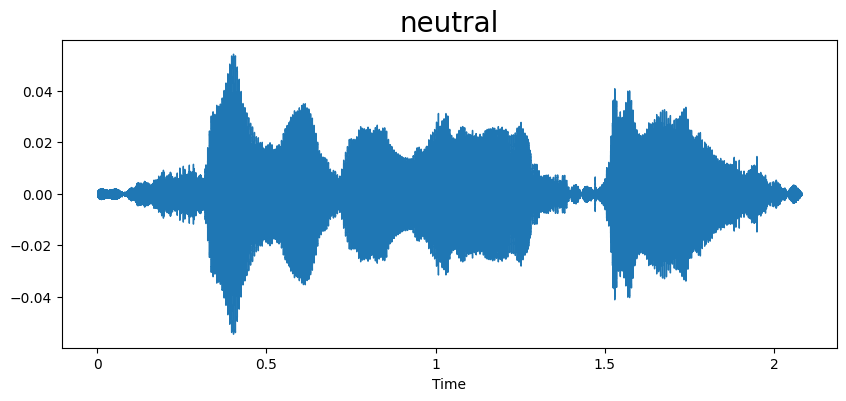

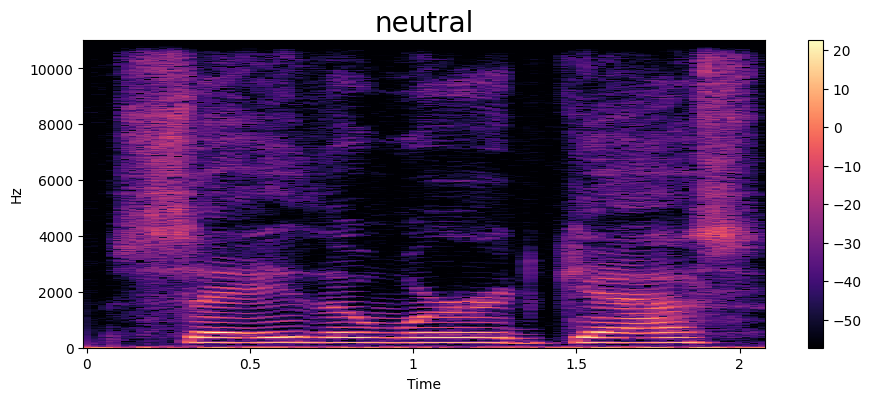

In [ ]:
df['speech'].unique()
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

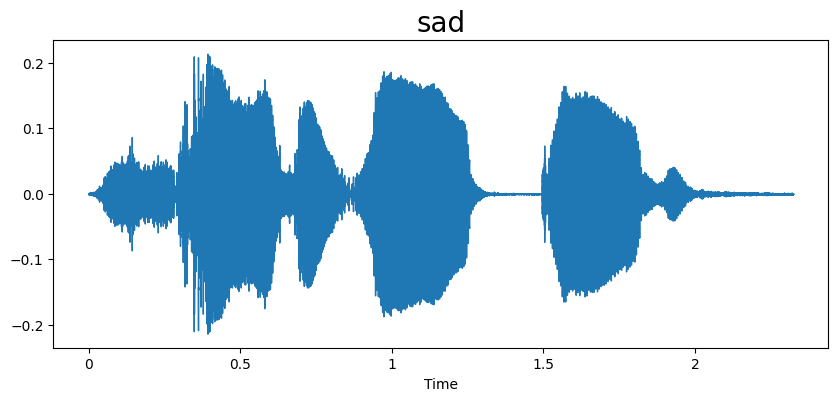

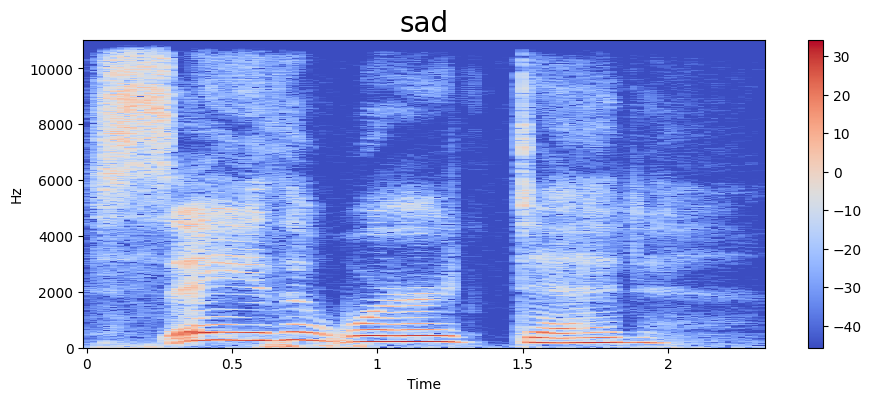

In [ ]:
df['speech'].unique()
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

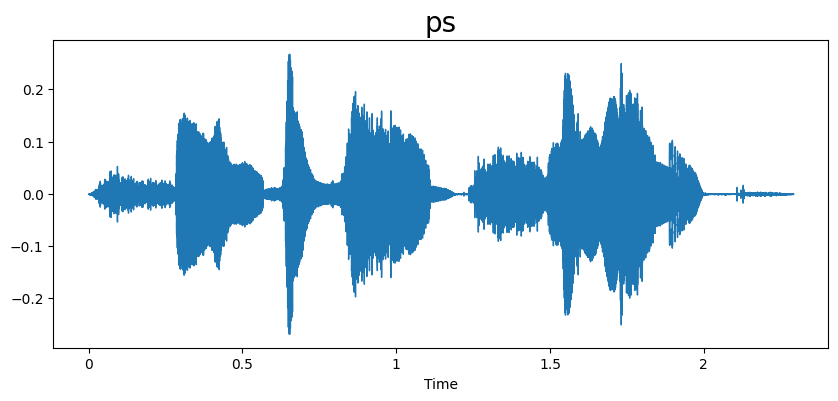

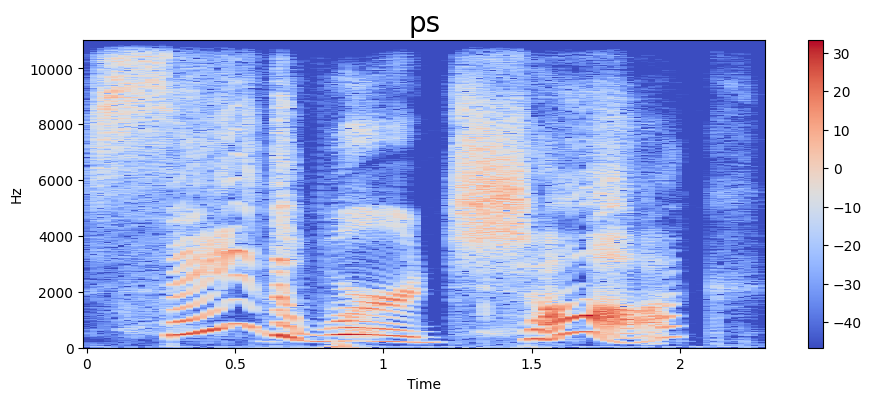

In [ ]:
df['speech'].unique()
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

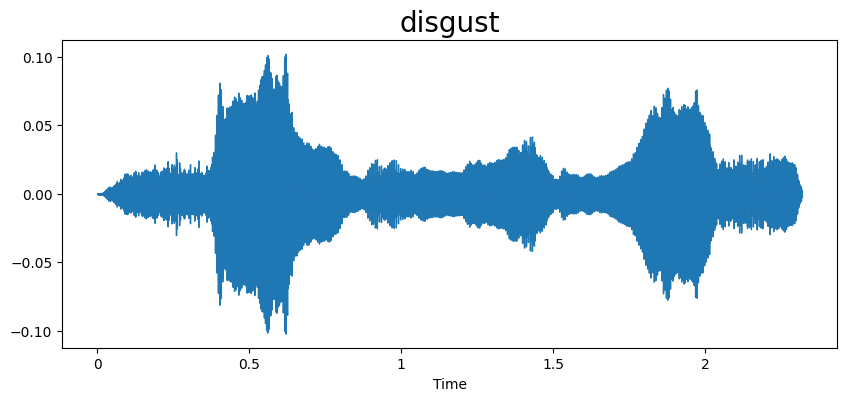

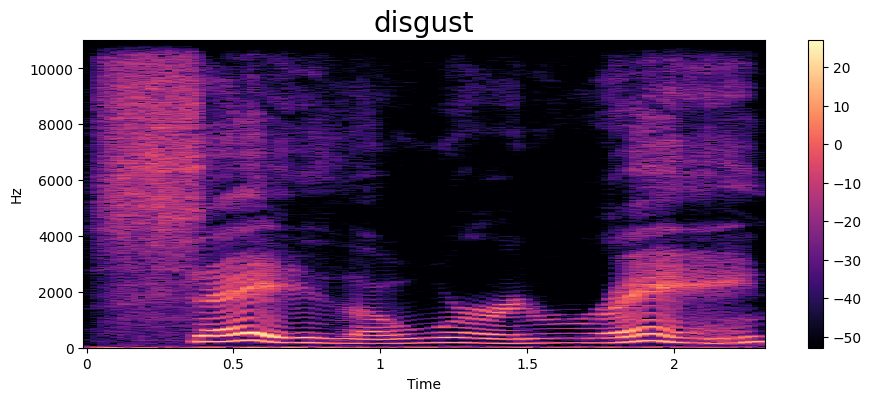

In [ ]:
df['speech'].unique()
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
  y,sr=librosa.load(filename, duration=3, offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-418.3699   ,   85.17869  ,   24.260214 ,   36.4116   ,
         -3.230713 ,    7.4758577,   -4.974261 ,  -10.288887 ,
          8.695558 ,   -6.8142424,   -5.9251127,   -2.360178 ,
         -7.553671 ,    9.259262 ,  -13.713553 ,    1.2253026,
          1.5797246,   -1.6978345,   -8.662093 ,   -2.984724 ,
         -5.9157486,   -7.3665395,   -3.2164469,    1.9674095,
         -3.2825391,    6.130838 ,   -2.7139792,    1.0424979,
         -1.3972652,   -0.4423034,    3.181221 ,   11.375088 ,
          7.873315 ,    5.4430213,    3.4363248,    2.3193414,
          2.9898553,    7.7627354,    5.53734  ,    8.532703 ],
      dtype=float32)

In [ ]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [ ]:
#input split
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])
y=y.toarray()
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model=Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')

])

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.2478 - loss: 1.8717 - val_accuracy: 0.6232 - val_loss: 1.1800
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 243ms/step - accuracy: 0.5145 - loss: 1.2251 - val_accuracy: 0.7214 - val_loss: 0.7638
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 0.6737 - loss: 0.8528 - val_accuracy: 0.7696 - val_loss: 0.6314
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.7628 - loss: 0.6591 - val_accuracy: 0.9286 - val_loss: 0.2862
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 239ms/step - accuracy: 0.8695 - loss: 0.3868 - val_accuracy: 0.9268 - val_loss: 0.2671
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.8735 - loss: 0.3841 - val_accuracy: 0.9429 - val_loss: 0.1770
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 0.9129 - loss: 0.3005 - val_accuracy: 0.9571 - val_loss: 0.1466
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.9393 - loss: 0.2375 - val_accurac

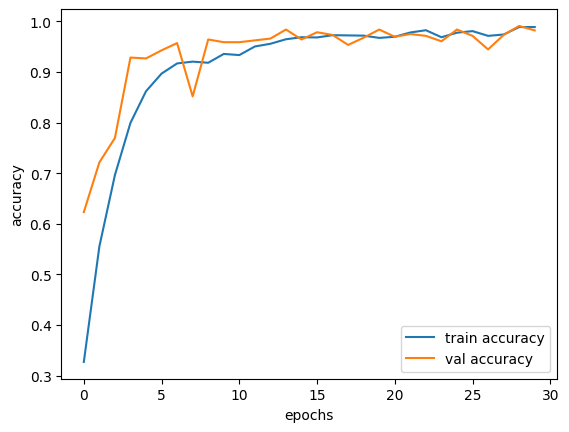

In [ ]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

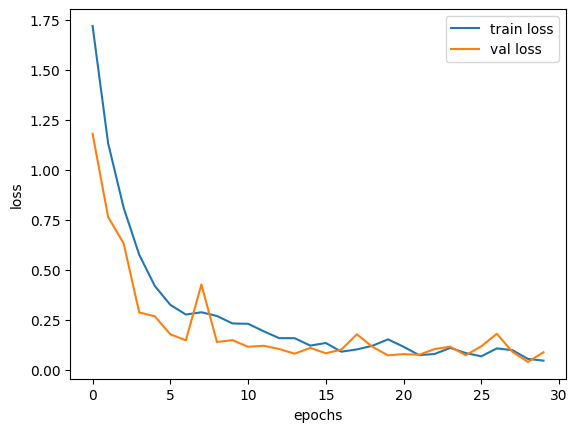

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_val_classes=np.argmax(y_val,axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[70  0  0  4  0  2  1]
 [ 0 61  0  0  0  2  0]
 [ 0  0 76  1  0  0  0]
 [ 0  0  0 99  0  0  0]
 [ 0  0  0  0 78  0  0]
 [ 0  0  0  0  0 86  0]
 [ 0  0  0  0  0  0 80]]


In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.91      0.95        77
     disgust       1.00      0.97      0.98        63
        fear       1.00      0.99      0.99        77
       happy       0.95      1.00      0.98        99
     neutral       1.00      1.00      1.00        78
          ps       0.96      1.00      0.98        86
         sad       0.99      1.00      0.99        80

    accuracy                           0.98       560
   macro avg       0.99      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560

